In [155]:
import os
from glob import glob
from skimage import data, io
import numpy as np
import cv2

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
%matplotlib inline

# declare functions

In [2]:
lfw2 = os.path.join('..', 'Data', 'lfw2')
def image_path(person, id_, lfw_folder = lfw2):
    return glob(os.path.join(lfw_folder, person, '*' + id_ + '.jpg'))[0]

In [3]:
'''
Parameters: 
    - img_matrix: (ndarray)
    - title: (string)
Output:
    - image plot
'''
def plt_img(img_matrix, title='Image'):
    io.imshow(img_matrix)
    plt.title(title)
    plt.show()

In [4]:
'''
Parameters: 
- Path: The image should be in the working directory or a full path of image
should be given;
- color: Second argument is a flag which specifies the way image should be read.
    cv2.IMREAD_COLOR : Loads a color image. Any transparency of image
    will be neglected;
    cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode;
    cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel;
Note Instead of these three flags, you can simply pass integers 1, 0 or -1
respectively.
Output:
- img_array: (ndarray)
'''
def open_img(path, color=0):
    return cv2.imread(path, color)

In [5]:
'''
Parameters:
- path_img: A string representing the file name. The filename must include image format like .jpg, .png, etc.

- img: It is the image that is to be saved (ndarray).

Return Value: It returns true if image is saved successfully.
'''

def save_img(path_img, img):
    cv2.imwrite(path_img, img) 

In [6]:
def getDF(path):
    with open(path) as f:
        file_list = f.readlines()
    n = int(file_list[0].strip())
    df_inicial = pd.read_csv(path, sep='\t', skiprows=1, nrows=n, names=['pair_name_1', 'pair_id_1', 'pair_id_2'])
    df_inicial['pair_name_2'] = None
    df_secondary = pd.read_csv(path, sep='\t', skiprows=n+1, names=['pair_name_1', 'pair_id_1', 'pair_name_2', 'pair_id_2'])
    df = pd.concat([df_inicial, df_secondary])
    df = df.reset_index(drop=True)
    print(df.shape)
    return df

In [7]:
def processImages(df, show=False, limit=np.inf):
    for index, row in df.iterrows():
        plt_img(open_img(row['path_pair_id_1'], color=0), title=os.path.split(row['path_pair_id_1'])[-1].split('.')[0])
        plt_img(open_img(row['path_pair_id_2'], color=0), title=os.path.split(row['path_pair_id_2'])[-1].split('.')[0])
        if limit == index + 1:
            break

# example

In [8]:
# data_folder = os.path.abspath('..\\data\\')
data_folder = os.path.join('..', 'Data')
train_path = Path(data_folder, 'pairsDevTrain.txt')
test_path = Path(data_folder, 'pairsDevTest.txt')

In [9]:
df_train = getDF(train_path)
df_test = getDF(test_path)

(2200, 4)
(1000, 4)


In [10]:
df_train['path_pair_id_1'] = df_train.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_1'])), axis=1)
df_train['path_pair_id_2'] = df_train.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_2'])) if x['pair_name_2']==None 
                                            else image_path(person=x['pair_name_2'], id_= str(x['pair_id_2'])), axis=1)

df_test['path_pair_id_1'] = df_test.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_1'])), axis=1)
df_test['path_pair_id_2'] = df_test.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_2'])) if x['pair_name_2']==None 
                                          else image_path(person=x['pair_name_2'], id_= str(x['pair_id_2'])), axis=1)

In [11]:
df_train.head()

,pair_name_1,pair_id_1,pair_id_2,pair_name_2,path_pair_id_1,path_pair_id_2
0,Aaron_Peirsol,1,2,None,../Data/lfw2/Aaron_Peirsol/Aaron_Peirsol_0001.jpg,../Data/lfw2/Aaron_Peirsol/Aaron_Peirsol_0002.jpg
1,Aaron_Peirsol,3,4,None,../Data/lfw2/Aaron_Peirsol/Aaron_Peirsol_0003.jpg,../Data/lfw2/Aaron_Peirsol/Aaron_Peirsol_0004.jpg
2,Aaron_Sorkin,1,2,None,../Data/lfw2/Aaron_Sorkin/Aaron_Sorkin_0001.jpg,../Data/lfw2/Aaron_Sorkin/Aaron_Sorkin_0002.jpg
3,Abdel_Nasser_Assidi,1,2,None,../Data/lfw2/Abdel_Nasser_Assidi/Abdel_Nasser_...,../Data/lfw2/Abdel_Nasser_Assidi/Abdel_Nasser_...
4,Abdullah,1,3,None,../Data/lfw2/Abdullah/Abdullah_0001.jpg,../Data/lfw2/Abdullah/Abdullah_0003.jpg


In [12]:
df_test.head()

,pair_name_1,pair_id_1,pair_id_2,pair_name_2,path_pair_id_1,path_pair_id_2
0,Abdullah_Gul,13,14,None,../Data/lfw2/Abdullah_Gul/Abdullah_Gul_0013.jpg,../Data/lfw2/Abdullah_Gul/Abdullah_Gul_0014.jpg
1,Abdullah_Gul,13,16,None,../Data/lfw2/Abdullah_Gul/Abdullah_Gul_0013.jpg,../Data/lfw2/Abdullah_Gul/Abdullah_Gul_0016.jpg
2,Abdullatif_Sener,1,2,None,../Data/lfw2/Abdullatif_Sener/Abdullatif_Sener...,../Data/lfw2/Abdullatif_Sener/Abdullatif_Sener...
3,Adel_Al-Jubeir,1,3,None,../Data/lfw2/Adel_Al-Jubeir/Adel_Al-Jubeir_000...,../Data/lfw2/Adel_Al-Jubeir/Adel_Al-Jubeir_000...
4,Al_Pacino,1,2,None,../Data/lfw2/Al_Pacino/Al_Pacino_0001.jpg,../Data/lfw2/Al_Pacino/Al_Pacino_0002.jpg


## One image

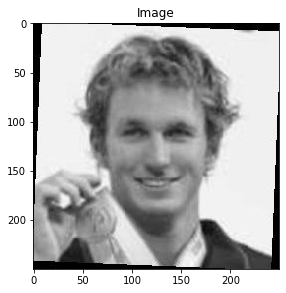

In [13]:
# plt_image method receives a ndarray (Figure)
plt_img(open_img(df_train.loc[0, 'path_pair_id_1'], color=0))

## Batch image

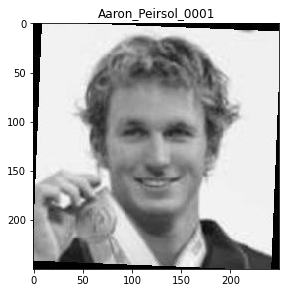

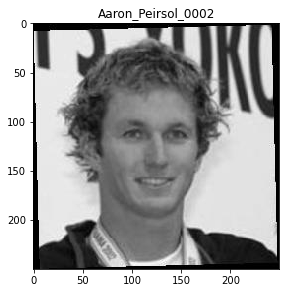

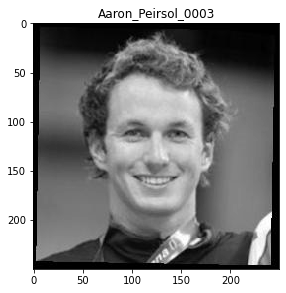

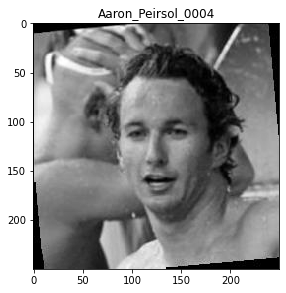

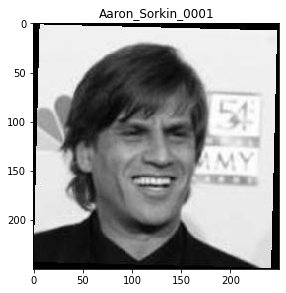

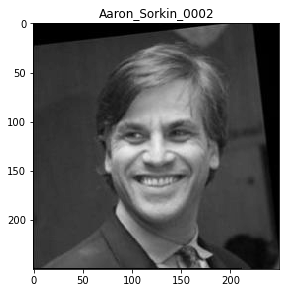

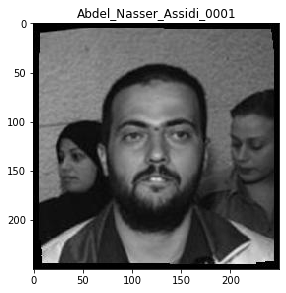

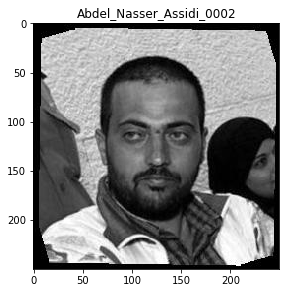

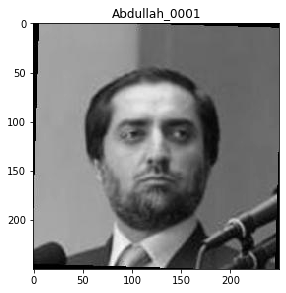

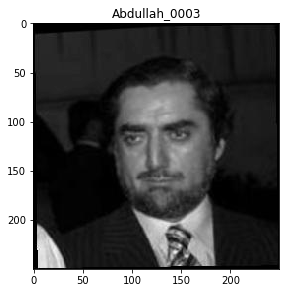

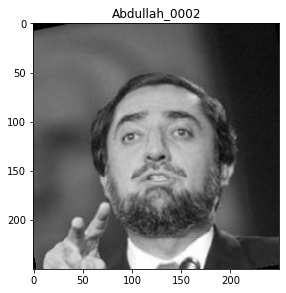

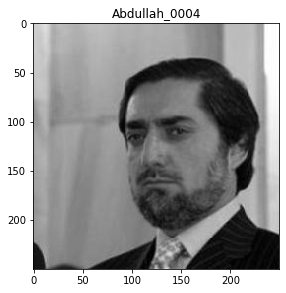

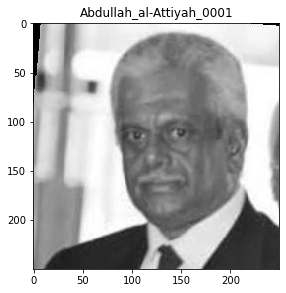

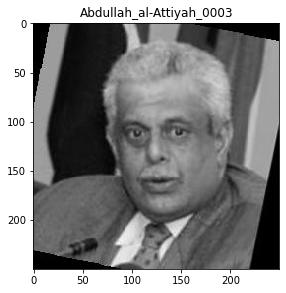

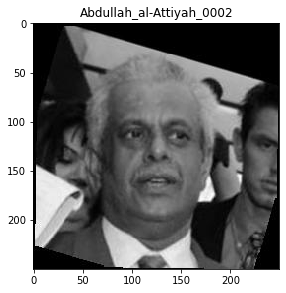

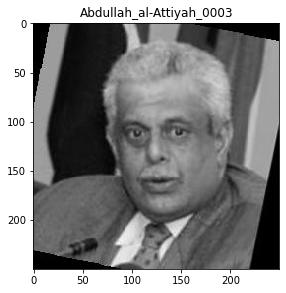

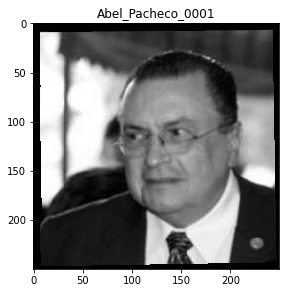

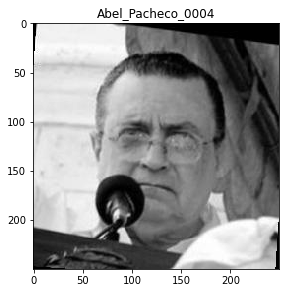

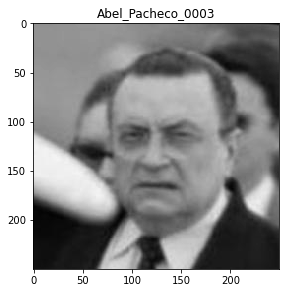

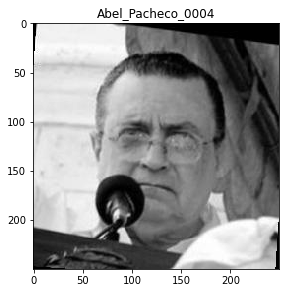

In [14]:
processImages(df=df_train, limit=10)

# Viola Jones

In [85]:
def plot_rectangle(detected_faces, image, title='Image', cmap_type='gray', kwargs={'lw': 20.}):
    # Create figure and axes
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(image, cmap=cmap_type)
    plt.title(title)
    for (column, row, width, height) in detected_faces:
        rect = Rectangle(
                (column, row),
                width = width,
                height = height,
                fill=False,
                edgecolor='r',
                
                )
        # Add the patch to the Axes
        ax.add_patch(rect)
#     plt.axis('off')
    plt.show()

In [86]:
def crop_image(original_image, column, row, width, height):
    # the goal is crop the biggest area
    return original_image[row:row+height, column:column + width]


In [87]:
# Load the classifier and create a cascade object for face detection
cascade_path = os.path.join('..', 'haarcascades', 'haarcascade_frontalface_alt.xml')
face_cascade = cv2.CascadeClassifier(cascade_path)

## Image with one face

In [88]:
original_image = open_img(df_train.loc[0, 'path_pair_id_1'], color=0)
grayscale_image = original_image.copy()

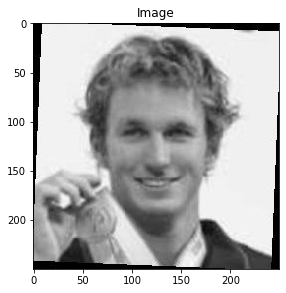

In [89]:
plt_img(original_image)

In [93]:
detected_faces = face_cascade.detectMultiScale(grayscale_image)

In [94]:
# (column, row, width, height)
detected_faces

array([[ 63,  63, 127, 127]], dtype=int32)

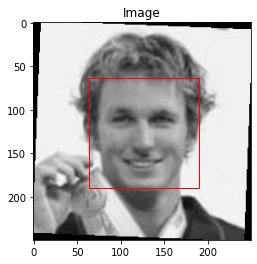

In [95]:
# Plot: area with facial recognition 
plot_rectangle(detected_faces, grayscale_image)

In [96]:
column, row, width, height = detected_faces[0]
cropped_image = crop_image(original_image=original_image, column=column, row=row, 
                           width=width, height=height)

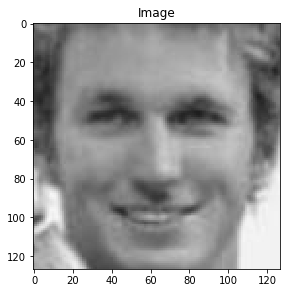

In [97]:
plt_img(cropped_image)

In [98]:
cropped_image.shape

(127, 127)

## Image with two or more faces

In [99]:
original_image = open_img(df_train.loc[3, 'path_pair_id_1'], color=0)
grayscale_image = original_image.copy()

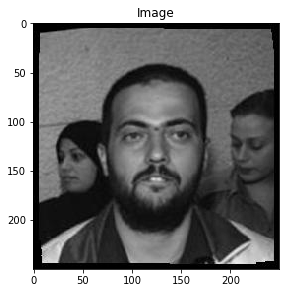

In [100]:
plt_img(original_image)

In [101]:
detected_faces = face_cascade.detectMultiScale(grayscale_image)

In [102]:
# ndarray with more than one row
detected_faces

array([[ 12, 117,  51,  51],
       [185, 101,  60,  60],
       [ 66,  66, 118, 118]], dtype=int32)

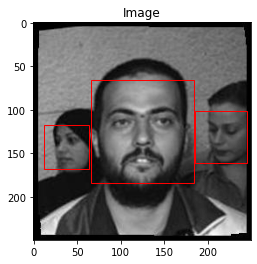

In [103]:
plot_rectangle(detected_faces, grayscale_image)

### Plot 1º rectangle

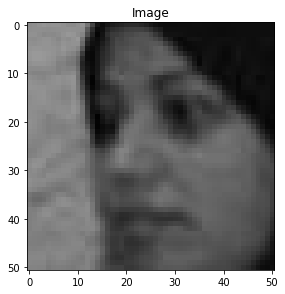

In [104]:
cropped_image = crop_image(original_image=original_image, column=detected_faces[0,0], row=detected_faces[0,1], 
                           width=detected_faces[0,2], height=detected_faces[0,3])

plt_img(cropped_image)

### Plot 2º rectangle

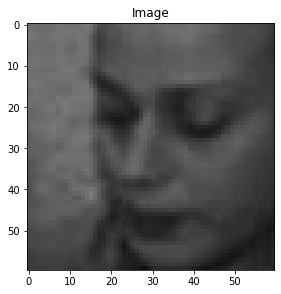

In [105]:
cropped_image = crop_image(original_image=original_image, column=detected_faces[1,0], row=detected_faces[1,1], 
                           width=detected_faces[1,2], height=detected_faces[1,3])

plt_img(cropped_image)

### Plot 3º rectangle

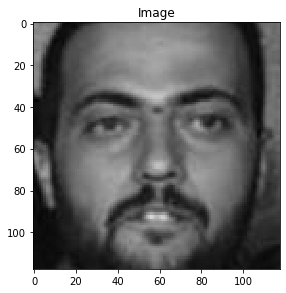

In [106]:
cropped_image = crop_image(original_image=original_image, column=detected_faces[2,0], row=detected_faces[2,1], 
                           width=detected_faces[2,2], height=detected_faces[2,3])

plt_img(cropped_image)

## Problem: what image to use?
### Response: Use the biggest area

In [139]:
def crop_biggest_area(original_image, detected_faces):
    
    # the goal is crop the biggest area
    if len(detected_faces) == 0: # viola jones didnt recognize any face
        return original_image, None
    else:
        # assuming all width == height
        max_width = 0
        id_max_max_width = np.nan
        for (i, (column, row, width, height)) in enumerate(detected_faces):
            if width > max_width:
                max_width = width
                id_max_max_width = i
        (column, row, width, height) = detected_faces[id_max_max_width]
        return crop_image(original_image, column, row, width, height), (column, row, width, height)

In [140]:
cropped_image, _ = crop_biggest_area(original_image, detected_faces)

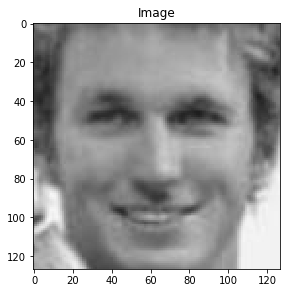

In [141]:
plt_img(cropped_image)

In [142]:
cropped_image.shape

(127, 127)

## Problem: images with differents shapes
### Response: Use the resize methods. So, cropped all images, then used resize methods to get a standard shape

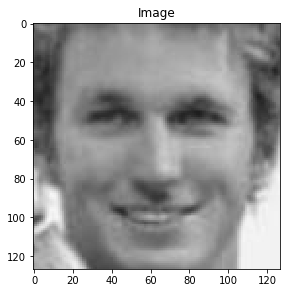

In [143]:
plt_img(cropped_image)

In [144]:
cropped_image.shape

(127, 127)

In [145]:
# UP dimension
width = 350
height = 350
dim = (width, height)
# resize image
resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)

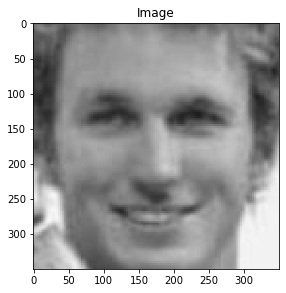

In [146]:
plt_img(resized)

In [147]:
# Down dimension
width = 70
height = 70
dim = (width, height)
# resize image
resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)

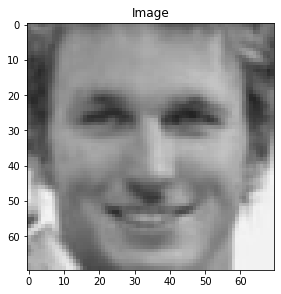

In [148]:
plt_img(resized)

# Apply preprocessing for all images

In [150]:
df_train['path_pair_id_1_cropped'] = df_train['path_pair_id_1'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_train['path_pair_id_1_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

df_train['path_pair_id_2_cropped'] = df_train['path_pair_id_2'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_train['path_pair_id_2_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

In [151]:
df_train.head()

,pair_name_1,pair_id_1,pair_id_2,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,Aaron_Peirsol,1,2,None,../Data/lfw2/Aaron_Peirsol/Aaron_Peirsol_0001.jpg,../Data/lfw2/Aaron_Peirsol/Aaron_Peirsol_0002.jpg,../Data/lfw2_cropped/Aaron_Peirsol/Aaron_Peirs...,../Data/lfw2_cropped/Aaron_Peirsol/Aaron_Peirs...
1,Aaron_Peirsol,3,4,None,../Data/lfw2/Aaron_Peirsol/Aaron_Peirsol_0003.jpg,../Data/lfw2/Aaron_Peirsol/Aaron_Peirsol_0004.jpg,../Data/lfw2_cropped/Aaron_Peirsol/Aaron_Peirs...,../Data/lfw2_cropped/Aaron_Peirsol/Aaron_Peirs...
2,Aaron_Sorkin,1,2,None,../Data/lfw2/Aaron_Sorkin/Aaron_Sorkin_0001.jpg,../Data/lfw2/Aaron_Sorkin/Aaron_Sorkin_0002.jpg,../Data/lfw2_cropped/Aaron_Sorkin/Aaron_Sorkin...,../Data/lfw2_cropped/Aaron_Sorkin/Aaron_Sorkin...
3,Abdel_Nasser_Assidi,1,2,None,../Data/lfw2/Abdel_Nasser_Assidi/Abdel_Nasser_...,../Data/lfw2/Abdel_Nasser_Assidi/Abdel_Nasser_...,../Data/lfw2_cropped/Abdel_Nasser_Assidi/Abdel...,../Data/lfw2_cropped/Abdel_Nasser_Assidi/Abdel...
4,Abdullah,1,3,None,../Data/lfw2/Abdullah/Abdullah_0001.jpg,../Data/lfw2/Abdullah/Abdullah_0003.jpg,../Data/lfw2_cropped/Abdullah/Abdullah_0001.jpg,../Data/lfw2_cropped/Abdullah/Abdullah_0003.jpg


In [152]:
def preprocessing(path_image, path_to_save, dim=(100, 100)):
    original_image = open_img(path_image, color=0)
    grayscale_image = original_image.copy()
    detected_faces = face_cascade.detectMultiScale(grayscale_image)
    cropped_image, _ = crop_biggest_area(original_image, detected_faces)
    resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)
    save_img(path_img=path_to_save, img=resized)

In [153]:
_ = df_train.apply(lambda x: preprocessing(path_image=x['path_pair_id_1'], path_to_save=x['path_pair_id_1_cropped']), axis=1)
_ = df_train.apply(lambda x: preprocessing(path_image=x['path_pair_id_2'], path_to_save=x['path_pair_id_2_cropped']), axis=1)

In [166]:
def getHeights(path_image_list):
    heights = []
    for img_path in path_image_list:
        original_image = open_img(img_path, color=0)
        grayscale_image = original_image.copy()
        detected_faces = face_cascade.detectMultiScale(grayscale_image)
        _, biggest_face = crop_biggest_area(original_image, detected_faces)
        if biggest_face is not None:
            heights.append(biggest_face[-1])
    return heights

In [167]:
all_training_paths = df_train['path_pair_id_1'].to_list() + df_train['path_pair_id_2'].to_list()
heights = getHeights(all_training_paths)

<AxesSubplot:>

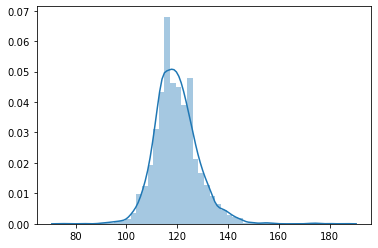

In [168]:
sns.distplot(heights)

In [169]:
np.mean(heights)

119.59670027497708

In [170]:
np.median(heights)

119.0